In [ ]:
import os
from google.colab import files
import json
import csv
from pandas import Series, DataFrame
import pandas as pd
import dateutil.parser as dparser
from random import randint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
# have the user input their file
files.upload()

In [ ]:
# extract the data from the file
with open("user_data.json", "r") as inFile:
  data = json.load(inFile)

In [ ]:
# extract the following and store in a list
following = []
follow_data = data['Activity']['Following List']['Following']
if follow_data != None:
  for f in data['Activity']['Following List']['Following']:
    following.append(f['UserName'])

In [ ]:
files.upload()

In [ ]:
# list of news accounts we came up with
#replace with path to news.csv as saved locally
news_accounts = pd.read_csv('news.csv')
news_accounts

,Username,Name,Description,Verified,Student Initials,Unnamed: 5
0,nytimes,The New York Times,We seek the truth and help people understand t...,Yes,EM,NaN
1,washingtonpost,The Washington Post,We are a newspaper,Yes,DAK,NaN
2,cnn,CNN,This is CNN,Yes,DAK,NaN
3,pbsnews,PBS NEWS HOUR,"A + News, C- Dancing",Yes,DAK,NaN
4,abcnews,ABC News,"All the news and information you need to see, ...",Yes,DAK,NaN
...,...,...,...,...,...,...
439,news_postseven,NEWSポストセブン,小学館のニュースサイト「NEWSポストセブン」の公式アカウントです。芸能スクープほか、最新ニ...,Yes,SH,NaN
440,ktlanews,KTLA5NEWS,Keeping Southern Californians informed since 1...,Yes,SH,NaN
441,5wcvb,WCVB Channel 5 Boston,Updates from Boston's News Leader: WCVB NewsCe...,Yes,SH,NaN
442,news5everywhere,News,The official TikTok account of @tv5manila’s ne...,Yes,SH,NaN


In [ ]:
# check for overlap
accounts = [account for account in news_accounts['Username'] if account in following]
print("Overlap between following list and news accounts: ")
for account in accounts:
  print(account, '\n')


if len(accounts) == 0:
  print("No news accounts followed")


Overlap between following list and news accounts: 
No news accounts followed


In [ ]:
import requests
def list_files_in_repo(owner, repo, path='', branch='master'):
    api_url = f"https://api.github.com/repos/{owner}/{repo}/contents/{path}?ref={branch}"
    response = requests.get(api_url)
    response.raise_for_status()  # Raise an exception for any errors

    contents = response.json()
    files = []
    for item in contents:
        if 'type' in item and item['type'] == 'file':
            files.append(item['name'])
        elif 'type' in item and item['type'] == 'dir':
            files.extend(list_files_in_repo(owner, repo, item['path'], branch))

    return files

# Example usage:
owner = 'amyhu0114'  # Replace with the GitHub username or organization
repo = 'CS315-project2-group2'  # Replace with the repository name
branch = 'main'  # Replace with the branch name if needed
path = 'pyktok_collection'  # Optional: path within the repository, leave empty for the root directory
files = list_files_in_repo(owner, repo, path, branch)
print(files)

['failed_to_locate_33534.csv', 'merged_results.csv', 'results.csv', 'results_33534.csv', 'results_38129.csv']


In [ ]:
#people = ['AH','LG','AW','RX','BB','SL']
rawpath = 'https://raw.githubusercontent.com/amyhu0114/CS315-project2-group2/main/pyktok_collection/'

def makeAllDF(person,condition,files,rawpath):
  df = pd.DataFrame()

  for f in files:
    if person in f and condition in f:
      this = pd.read_csv(rawpath+f)
      df = pd.concat([df, this])

      #print(f)

  return df

In [ ]:
user_33534 = makeAllDF('33534','results',files,rawpath)
#user_33534
user_11111 = pd.read_csv('https://raw.githubusercontent.com/amyhu0114/CS315-project2-group2/main/pyktok_collection/results.csv')
user_11111

,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,video_playcount,video_description,video_is_ad,video_stickers,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified
0,7315561816673750318,2023-12-22T18:16:20,18.0,US,"flipnote, flipnote animation, asdf movie, flip...",3500000.0,39500.0,10800.0,18700000.0,Bonus flipnote for you,False,NaN,zanelittlemusic,Zane Little,NaN,NaN,NaN,NaN,NaN,False
1,7315561816673750318,2023-12-22T18:16:20,18.0,US,"flipnote, flipnote animation, asdf movie, flip...",3500000.0,39500.0,10800.0,18700000.0,Bonus flipnote for you,False,NaN,zanelittlemusic,Zane Little,NaN,NaN,NaN,NaN,NaN,False
2,7315561816673750318,2023-12-22T18:16:20,18.0,US,"flipnote, flipnote animation, asdf movie, flip...",3500000.0,39500.0,10800.0,18700000.0,Bonus flipnote for you,False,NaN,zanelittlemusic,Zane Little,NaN,NaN,NaN,NaN,NaN,False
3,7315561816673750318,2023-12-22T18:16:20,18.0,US,"flipnote, flipnote animation, asdf movie, flip...",3500000.0,39500.0,10800.0,18700000.0,Bonus flipnote for you,False,NaN,zanelittlemusic,Zane Little,NaN,NaN,NaN,NaN,NaN,False
4,7315561816673750318,2023-12-22T18:16:20,18.0,US,"flipnote, flipnote animation, asdf movie, flip...",3500000.0,39500.0,10800.0,18700000.0,Bonus flipnote for you,False,NaN,zanelittlemusic,Zane Little,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,7321132514330905899,2024-01-06T18:33:34,58.0,US,"fake awake by tarte, Tarte Cosmetics, tubing m...",107500.0,1162.0,521.0,18500000.0,Replying to @Ashley Hunsucker The Tarte trio d...,True,NaN,michellesays,Michelle,NaN,NaN,NaN,NaN,NaN,False
8064,7331962685812215042,2024-02-04T22:59:56,6.0,FAKE-AD,"Body Deodorant, Deodorant For Body Odor, Deodo...",5589.0,118.0,92.0,10600000.0,72 HR odor protection from pits to bits. Avail...,True,NaN,Secret,Secret,NaN,NaN,NaN,NaN,NaN,False
8065,7335549375667653934,2024-02-14T14:58:41,64.0,US,"Bk Beauty Brushes, bk beauty, concealer brush,...",23200.0,113.0,205.0,1300000.0,"I’m a deal fiend, so I figured I would share. ...",True,NaN,itsmakeupbymelissam,Melissa Murdick,NaN,NaN,NaN,NaN,NaN,True
8066,7337225129354661153,2024-02-19T03:21:02,62.0,GB,NaN,12600.0,84.0,439.0,3200000.0,One Line 9 is actually so hard #oneline #filte...,False,NaN,ethancaf,EthanC24,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
user_33534

In [ ]:
user_33534[user_33534['video_locationcreated']=="FAKE-AD"][["video_locationcreated","suggested_words", "author_followercount", "author_videocount","video_is_ad"]]

,video_locationcreated,suggested_words,author_followercount,author_videocount,video_is_ad
30,FAKE-AD,"savings, Saving Money Envelopes, saving money ...",NaN,NaN,True
42,FAKE-AD,"Opi Nail Polish, Painting My Nails, Makeup Pal...",NaN,NaN,True
47,FAKE-AD,"knorr, Good Food, Food To Eat, food ideas, foo...",NaN,NaN,True
53,FAKE-AD,"Puppy Dog, puppy, Puppy Treats, teeth, Puppy V...",NaN,NaN,True
64,FAKE-AD,"Charli D'amelio, garnier fructis, Garnier, Gar...",NaN,NaN,True
...,...,...,...,...,...
7573,FAKE-AD,NaN,NaN,NaN,True
7584,FAKE-AD,investment banking,NaN,NaN,True
7589,FAKE-AD,NaN,NaN,NaN,True
7593,FAKE-AD,NaN,NaN,NaN,True


In [ ]:
user_33534['video_locationcreated'].value_counts().nlargest(3)

US         518
FAKE-AD     87
GB          61
Name: video_locationcreated, dtype: int64

In [ ]:
user_11111['video_locationcreated'].value_counts().nlargest(3)

US         5411
FAKE-AD     724
GB          487
Name: video_locationcreated, dtype: int64

In [ ]:
def get_top_countries_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(5)


account1 = get_top_countries_frequent(user_33534['video_locationcreated'])
account1
account2 = get_top_countries_frequent(user_11111['video_locationcreated'])
account2

[('US', 5411), ('FAKE-AD', 724), ('GB', 487), ('CA', 228), ('MX', 170)]

<ipython-input-16-c9b94c97c694>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(countries, rotation=0, fontsize=20)


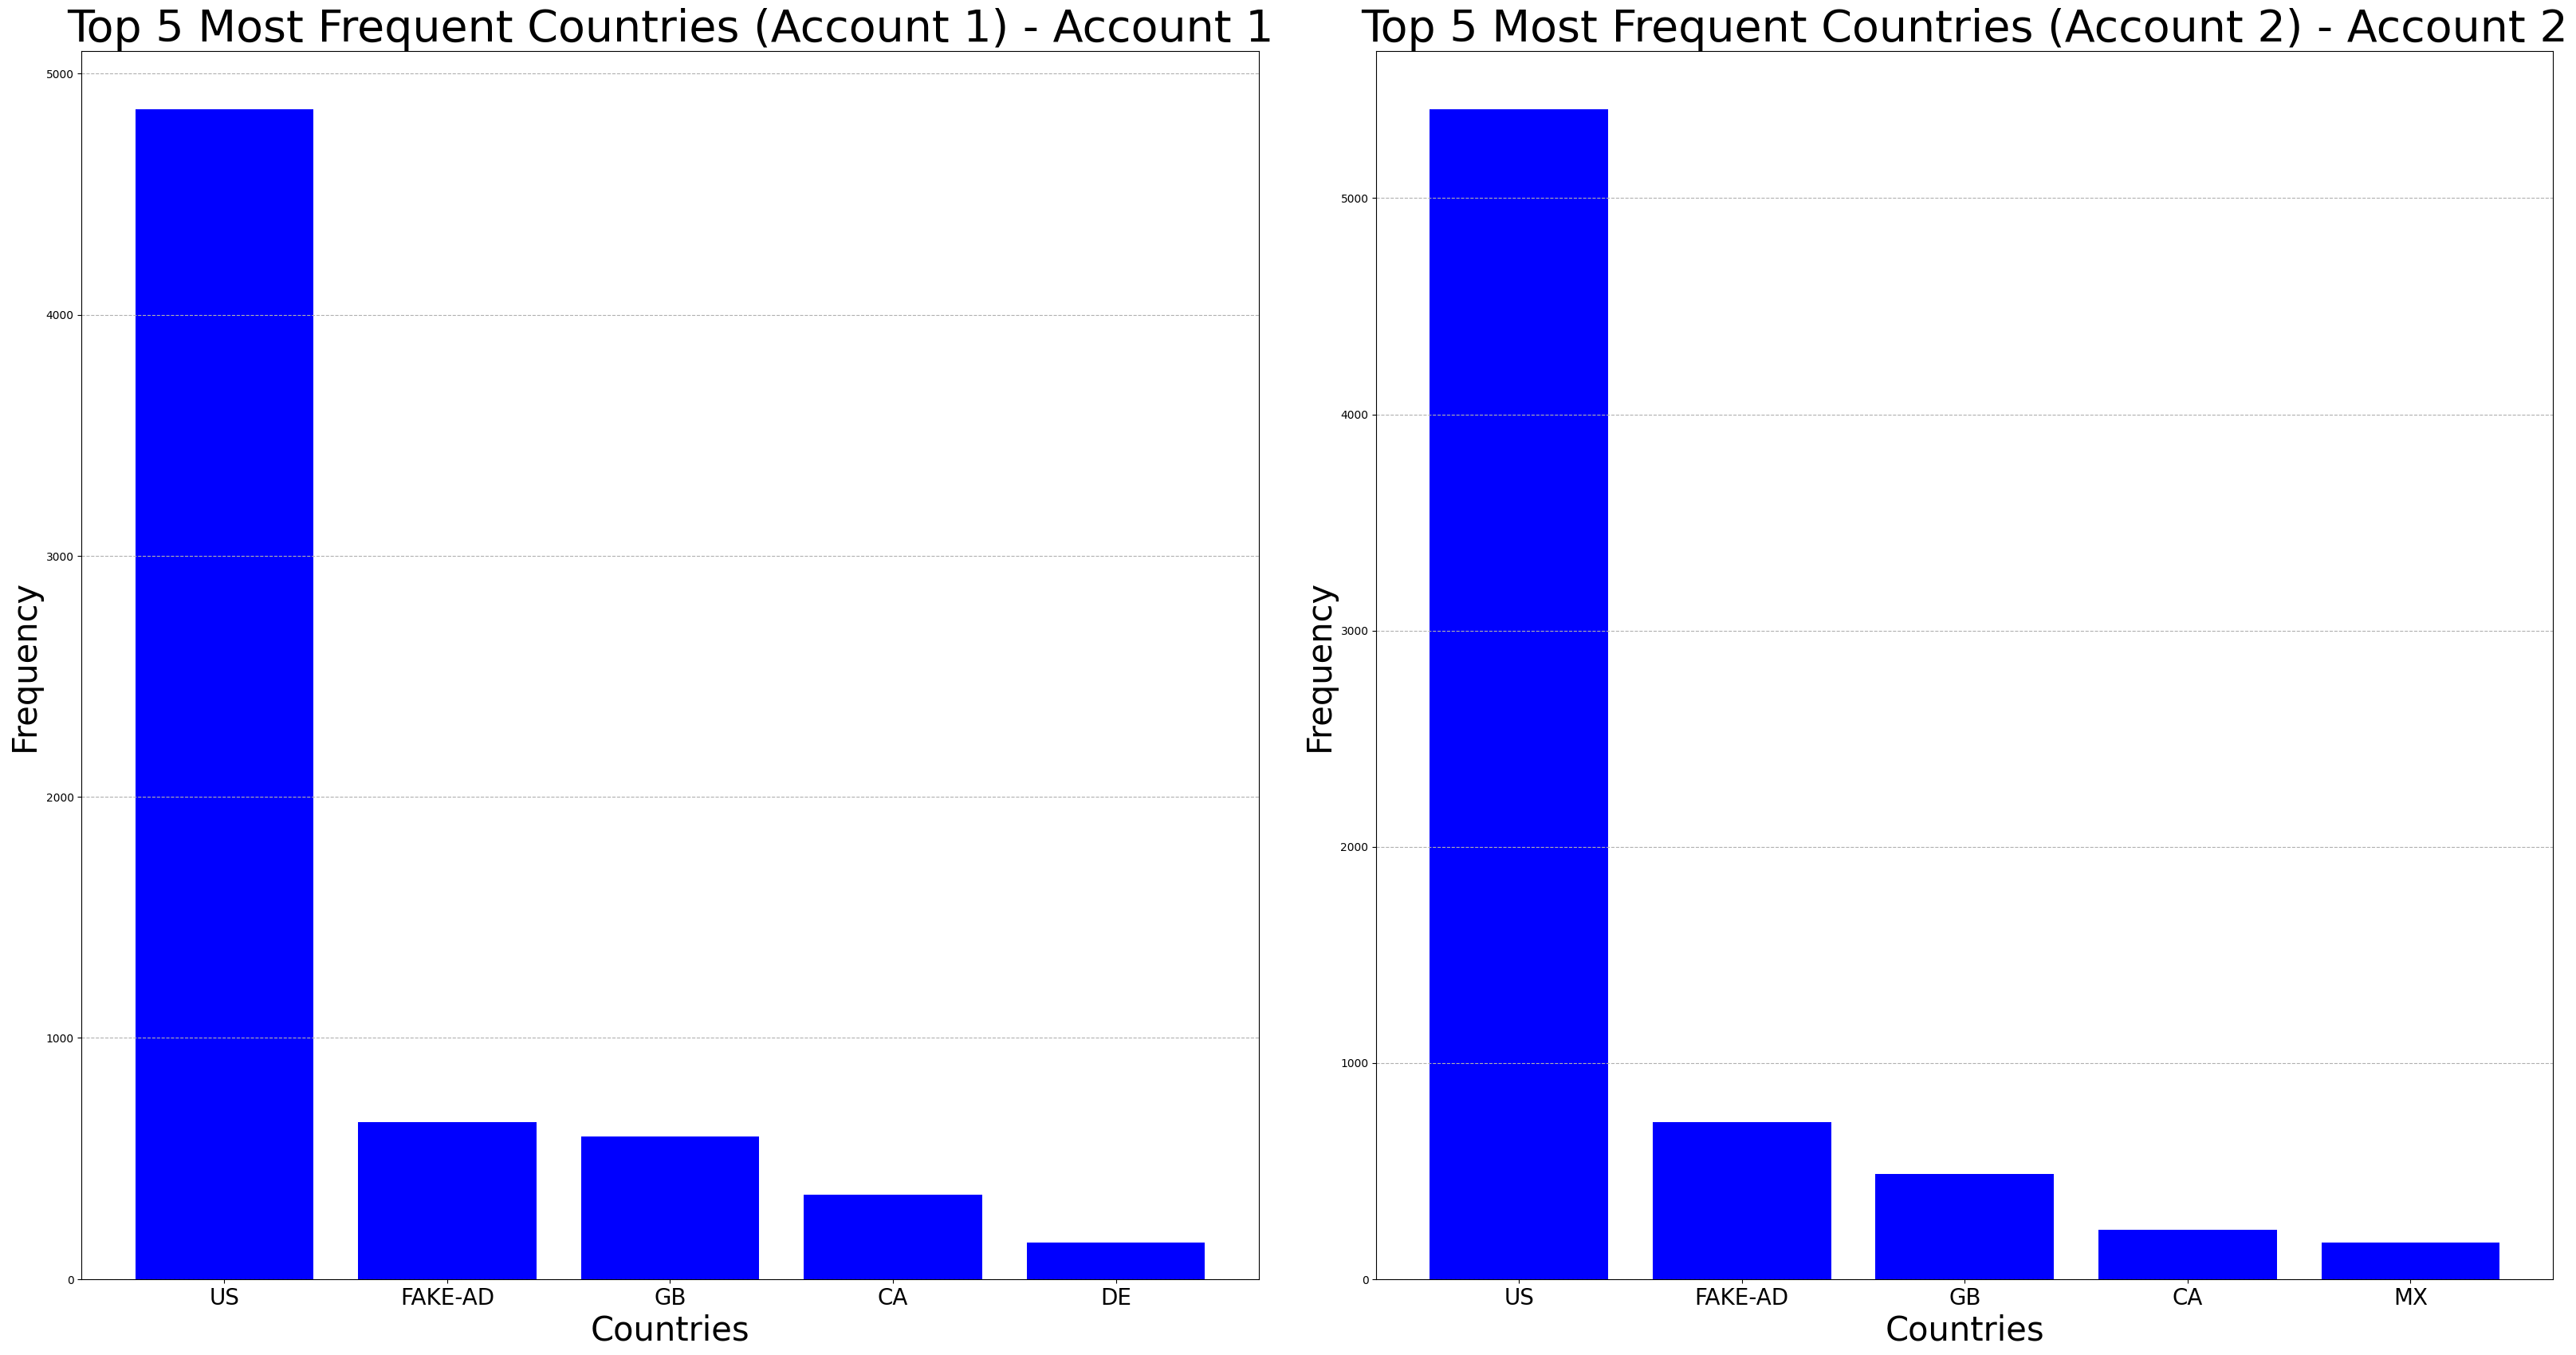

In [ ]:
#fig, axes = plt.subplots(2, 3, figsize=(40, 20))
fig, axes = plt.subplots(1, 2, figsize=(40, 20))
axes = axes.flatten()

for i, (data, id, account) in enumerate(zip([account1,account2],
                                       ['Account 1', 'Account 2'], ['Account 1', 'Account 2'])):
    countries, counts = zip(*data)
    axes[i].bar(countries, counts, color='blue')
    axes[i].set_title(f'Top 5 Most Frequent Countries ({account}) - {id}', fontsize=40)
    axes[i].set_xlabel('Countries', fontsize=30)
    axes[i].set_ylabel('Frequency', fontsize=30)
    axes[i].grid(axis='y', linestyle='--')
    axes[i].set_xticklabels(countries, rotation=0, fontsize=20)


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.3)  # Increase the horizontal and vertical spacing
plt.show()
